# Multiple tube generation experiment processing

![element_number=40, length_mean=40, radius_mean=5, measurement_resolution=20](id26en40lm40rm5mr20.png)
element_number=40, length_mean=40, radius_mean=5, measurement_resolution=20
![element_number=40, length_mean=40, radius_mean=5, measurement_resolution=10](id26en40lm40rm5mr10.png)
element_number=40, length_mean=40, radius_mean=5, measurement_resolution=10

In [264]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [265]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os.path as op
from pprint import pprint as pp
import scipy.stats
import seaborn as sns


In [266]:
datapath = "~/teigen_data/output_rows.csv"

In [267]:
plotkw ={
    "figsize": [9, 6], 
    # "fontsize": 14
}

In [268]:
df = pd.read_csv(op.expanduser(datapath))
pp(df.keys())

# df

Index([u'datetime', u'length [mm]', u'volume [mm^3]', u'surface [mm^2]',
       u'area volume [mm^3]', u'count []', u'numeric volume [mm^3]',
       u'numeric surface [mm^2]', u'length d. [mm^-2]', u'volume d. []',
       u'surface d. [mm^-1]', u'appearance noise_preview',
       u'appearance show_aposteriori_surface',
       u'appearance skip_volume_generation', u'areasampling areasize_mm',
       u'areasampling areasize_px', u'areasampling voxelsize_mm',
       u'filepattern', u'generator_id',
       u'generators Continuous tubes element_number',
       u'generators Continuous tubes fixed_radius_distribution',
       u'generators Continuous tubes normal_radius_distribution',
       u'generators Continuous tubes radius_distribution_maximum',
       u'generators Continuous tubes radius_distribution_mean',
       u'generators Continuous tubes radius_distribution_minimum',
       u'generators Continuous tubes radius_distribution_standard_deviation',
       u'generators Continuous tubes r

In [269]:
df

,datetime,length [mm],volume [mm^3],surface [mm^2],area volume [mm^3],count [],numeric volume [mm^3],numeric surface [mm^2],length d. [mm^-2],volume d. [],...,postprocessing limit_negative_intensities,postprocessing measurement_resolution,postprocessing negative,postprocessing noise_amplitude,postprocessing noise_exponent,postprocessing noise_lambda_start,postprocessing noise_lambda_stop,postprocessing noise_mean,postprocessing noise_rng_seed,postprocessing output_dtype
0,2017-05-26T00:10:51.194786,86.48132,102803.532046,12931.022562,1100000.0,5.0,103142.713506,13057.748832,0.000079,0.093458,...,True,10,False,40.0,0.0001,0.1,3.0,30.0,0,uint8
1,2017-05-26T00:10:57.550823,86.48132,102803.532046,12931.022562,1100000.0,5.0,102933.413928,12997.859022,0.000079,0.093458,...,True,13,False,40.0,0.0001,0.1,3.0,30.0,0,uint8
2,2017-05-26T00:11:04.247046,86.48132,102803.532046,12931.022562,1100000.0,5.0,103889.858604,13006.564220,0.000079,0.093458,...,True,15,False,40.0,0.0001,0.1,3.0,30.0,0,uint8
3,2017-05-26T00:11:12.826362,86.48132,102803.532046,12931.022562,1100000.0,5.0,104139.382836,12981.461401,0.000079,0.093458,...,True,18,False,40.0,0.0001,0.1,3.0,30.0,0,uint8
4,2017-05-26T00:11:22.940957,86.48132,102803.532046,12931.022562,1100000.0,5.0,103250.014147,12975.590998,0.000079,0.093458,...,True,21,False,40.0,0.0001,0.1,3.0,30.0,0,uint8
5,2017-05-26T00:11:35.352634,86.48132,102803.532046,12931.022562,1100000.0,5.0,102821.930058,12946.422092,0.000079,0.093458,...,True,25,False,40.0,0.0001,0.1,3.0,30.0,0,uint8
6,2017-05-26T00:11:49.494064,86.48132,102803.532046,12931.022562,1100000.0,5.0,103129.141322,12962.641465,0.000079,0.093458,...,True,28,False,40.0,0.0001,0.1,3.0,30.0,0,uint8
7,2017-05-26T00:12:05.536758,86.48132,102803.532046,12931.022562,1100000.0,5.0,102986.086771,12945.193345,0.000079,0.093458,...,True,30,False,40.0,0.0001,0.1,3.0,30.0,0,uint8
8,2017-05-26T00:12:36.728166,86.48132,102803.532046,12931.022562,1100000.0,5.0,102946.178750,12944.364284,0.000079,0.093458,...,True,40,False,40.0,0.0001,0.1,3.0,30.0,0,uint8
9,2017-05-26T00:13:34.435095,86.48132,102803.532046,12931.022562,1100000.0,5.0,103061.164597,12946.133572,0.000079,0.093458,...,True,50,False,40.0,0.0001,0.1,3.0,30.0,0,uint8


In [270]:

df = pd.read_csv(op.expanduser(datapath))
df["surface error [mm^2]"] = df["numeric surface [mm^2]"] - df["surface [mm^2]"]
df["surface error [%]"] = df["surface error [mm^2]"] / df["surface [mm^2]"] * 100
df["volume error [mm^3]"] = df["numeric volume [mm^3]"] - df["volume [mm^3]"]
df["volume error [%]"] = df["volume error [mm^3]"] / df["volume [mm^3]"] * 100
df["measurement_resolution"] = df["postprocessing measurement_resolution"]
df["length_distribution_mean"] = df["generators Unconnected tubes length_distribution_mean"]


# Numeric measurement precision (element_numer = 20, length_mean = 15)

In [271]:

dfs = df[
    df["output note"] == "resolution sphere"
    # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
]
dfsp = dfs[["surface error [%]", "volume error [%]", "measurement_resolution"]].sort_values(
    "measurement_resolution")
if len(dfsp) > 0:
    dfsp.plot(x="measurement_resolution", **plotkw)
dfsp

,surface error [%],volume error [%],measurement_resolution


In [272]:

#sns.factorplot("measurement_resolution", "surface error [%]", data=dfs)#.set(ylim=(0, 1))


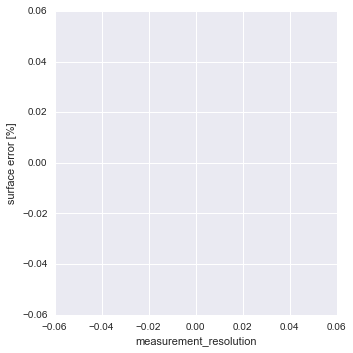

In [273]:

sns.lmplot("measurement_resolution", "surface error [%]", data=dfs)#.set(ylim=(0, 1))

In [274]:
dfs = df[
    df["output note"] == "resolution tube"
    # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
]
dfsp = dfs[["surface error [%]", "volume error [%]", "measurement_resolution"]].sort_values(
    "measurement_resolution")
if len(dfsp) > 0:
    dfsp.plot( x="measurement_resolution", **plotkw)
# dfsp

In [275]:
# df = pd.read_csv(op.expanduser(datapath))
# df["surface error [mm^2]"] = np.abs(df["numeric surface [mm^2]"] - df["surface [mm^2]"])
# df["surface error [%]"] = df["surface error [mm^2]"] / df["surface [mm^2]"] * 100
# df["volume error [mm^3]"] = np.abs(df["numeric volume [mm^3]"] - df["volume [mm^3]"])
# df["volume error [%]"] = df["volume error [mm^3]"] / df["volume [mm^3]"] * 100
# df["measurement_resolution"] = df["postprocessing measurement_resolution"]
dfs = df[
    df["output note"] == "tube length"
    # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
]
dfsp = dfs[["surface error [%]", "volume error [%]", "length_distribution_mean"]].sort_values(
    "length_distribution_mean")
if len(dfsp) > 0:
    dfsp.plot( x="measurement_resolution", **plotkw)


In [276]:
import seaborn as sns

In [277]:
pd.__path__

['/Users/mjirik/miniconda/lib/python2.7/site-packages/pandas']

In [278]:
pd.__version__

u'0.20.1'

In [279]:
## element_number = 10, 
df["output note"]

0    compensation method 5 tubes best
1    compensation method 5 tubes best
2    compensation method 5 tubes best
3    compensation method 5 tubes best
4    compensation method 5 tubes best
5    compensation method 5 tubes best
6    compensation method 5 tubes best
7    compensation method 5 tubes best
8    compensation method 5 tubes best
9    compensation method 5 tubes best
Name: output note, dtype: object

## Compensation methods

In [280]:
def dfplot(dfs, plotkw, radius_method=""):
    
    dfsp = dfs[["surface error [%]", "volume error [%]", "measurement_resolution"]].sort_values(
        "measurement_resolution")
    
    if len(dfsp) < 1:
        return dfsp
    # wilcoxon - čím větší, tím lepší, alespoň 0.05
    surf_w = scipy.stats.wilcoxon(x=dfs["surface [mm^2]"], y=dfs["numeric surface [mm^2]"], correction=False, zero_method="pratt")
    # spearman čím menší, tím lepší
    surf_s = scipy.stats.spearmanr(dfs["surface [mm^2]"], dfs["numeric surface [mm^2]"])
    
    # wilcoxon - čím větší, tím lepší
    vol_w = scipy.stats.wilcoxon(x=dfs["volume [mm^3]"], y=dfs["numeric volume [mm^3]"], correction=False, zero_method="pratt")
    # spearman čím menší, tím lepší
    vol_s = scipy.stats.spearmanr(dfs["volume [mm^3]"], dfs["numeric volume [mm^3]"])
    
    print radius_method, ": \nsurface (w/s): \n" , surf_w,"\n", surf_s, "\nvolume (w/s): \n", vol_w, "\n",vol_s
    fig = plt.figure(figsize=[25, 18])
    ax = plt.subplot(121)
    dfsp.plot(
        ax=ax, x="measurement_resolution", **plotkw)
    ax = plt.subplot(122)
    dfsp[["surface error [%]", "volume error [%]"]].plot(
        ax=ax, kind="box", **plotkw)
    plt.suptitle(radius_method)
    return dfsp

### 1 sphere

In [281]:
for radius_method in ["inscribed", "circumscribed", "cylinder surface", "cylinder volume", "average", "cylinder volume + sphere compensation"]:
        
    dfs = df[
        df["output note"] == "compensation method 1 sphere " + radius_method
        # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
    ]
    dfplot(dfs, plotkw, radius_method)
    


### 1 tube

In [282]:
for radius_method in ["cylinder volume + sphere compensation"]:
        
    dfs = df[
        df["output note"] == "compensation method 1 tube " + radius_method
        # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
    ]
    
    dfplot(dfs, plotkw, radius_method)


## 5 tubes

/Users/mjirik/miniconda/lib/python2.7/site-packages/numpy/lib/function_base.py:2569: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/mjirik/miniconda/lib/python2.7/site-packages/numpy/lib/function_base.py:2570: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/mjirik/miniconda/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)


best : 
surface (w/s): 
WilcoxonResult(statistic=0.0, pvalue=0.0050620321262678644) 
SpearmanrResult(correlation=nan, pvalue=nan) 
volume (w/s): 
WilcoxonResult(statistic=0.0, pvalue=0.0050620321262678644) 
SpearmanrResult(correlation=nan, pvalue=nan)


/Users/mjirik/miniconda/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mjirik/miniconda/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


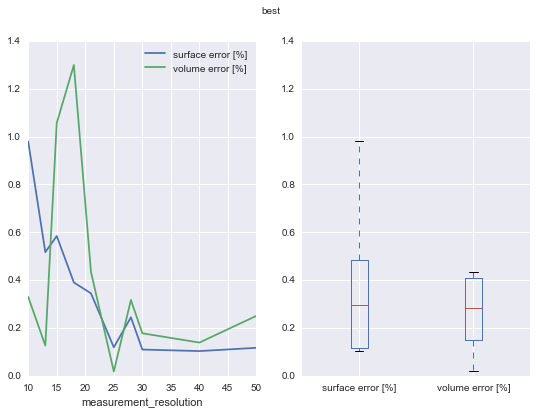

In [283]:
# for radius_method in ["cylinder volume + sphere compensation"]:
for radius_method in ["cylinder surface", "cylinder volume", "cylinder volume + sphere compensation", "best"]:

        
    dfs = df[
        df["output note"] == "compensation method 5 tubes " + radius_method
    ]
    
    dfplot(dfs, plotkw, radius_method)
#     dfsp = dfs[["surface error [%]", "volume error [%]", "measurement_resolution"]].sort_values(
#         "measurement_resolution")
#     
#     fig = plt.figure(figsize=[25, 18])
#     ax = plt.subplot(121)
#     dfsp.plot(
#         ax=ax, x="measurement_resolution", **plotkw)
#     ax = plt.subplot(122)
#     dfsp[["surface error [%]", "volume error [%]"]].plot(
#         ax=ax, kind="box", **plotkw)
#     plt.suptitle(radius_method)
# 

In [284]:
for radius_method in ["inscribed", "circumscribed", "cylinder surface", 
                      "cylinder volume", "average", "cylinder volume + sphere compensation"]:
        
    dfs = df[
        df["output note"] == "compensation method " + radius_method
        # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
    ]
    
    dfplot(dfs, plotkw, radius_method)


### Radius estimation

In [285]:
dfs[["volume [mm^3]"]]

,volume [mm^3]


In [286]:
### Kontrolní výpočet objemu

In [287]:
v_sphere = (4.0/3.0) * np.pi * 20.0**3
v_sphere

33510.32163829113

In [288]:
v_cylinder = np.pi*20.0**2 * 2.6696777
v_cylinder

3354.815939908998

In [289]:
v_cylinder + v_sphere

36865.13757820013


# Numeric and analytic error

## measurement_resolution = 25

In [290]:
# df = pd.read_csv(op.expanduser(datapath))
# df["surface error [mm^2]"] = df["numeric surface [mm^2]"] - df["surface [mm^2]"]
# df["surface error [%]"] = df["surface error [mm^2]"] / df["surface [mm^2]"] * 100
# df["volume error [mm^3]"] = df["numeric volume [mm^3]"] - df["volume [mm^3]"]
# df["volume error [%]"] = df["volume error [mm^3]"] / df["volume [mm^3]"] * 100
# df["measurement_resolution"] = df["postprocessing measurement_resolution"]
# df["element_number"] = df["generators Unconnected tubes element_number"]
# df["length_distribution_mean"] = df["generators Unconnected tubes radius_distribution_mean"]
# df["radius_distribution_mean"] = df["generators Unconnected tubes length_distribution_mean"]
dfs = df[
    df["output note"] == "compensation method 5 tubes " + "best"
]
dfsp = dfs[["volume [mm^3]", "numeric volume [mm^3]", "surface [mm^2]", "numeric surface [mm^2]", "surface error [%]", "volume error [%]"]]
dfsp

,volume [mm^3],numeric volume [mm^3],surface [mm^2],numeric surface [mm^2],surface error [%],volume error [%]
0,102803.532046,103142.713506,12931.022562,13057.748832,0.980017,0.329932
1,102803.532046,102933.413928,12931.022562,12997.859022,0.516869,0.126340
2,102803.532046,103889.858604,12931.022562,13006.564220,0.584189,1.056702
3,102803.532046,104139.382836,12931.022562,12981.461401,0.390061,1.299421
4,102803.532046,103250.014147,12931.022562,12975.590998,0.344663,0.434306
5,102803.532046,102821.930058,12931.022562,12946.422092,0.119090,0.017896
6,102803.532046,103129.141322,12931.022562,12962.641465,0.244520,0.316730
7,102803.532046,102986.086771,12931.022562,12945.193345,0.109587,0.177576
8,102803.532046,102946.178750,12931.022562,12944.364284,0.103176,0.138757
9,102803.532046,103061.164597,12931.022562,12946.133572,0.116859,0.250607


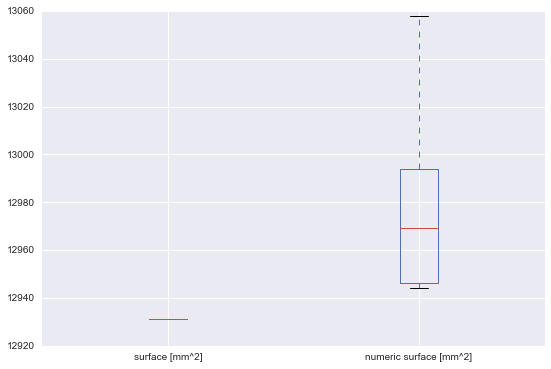

In [291]:
if len(dfsp) > 0:
    axp = dfsp[["surface [mm^2]", "numeric surface [mm^2]"]].plot(kind="box", **plotkw)

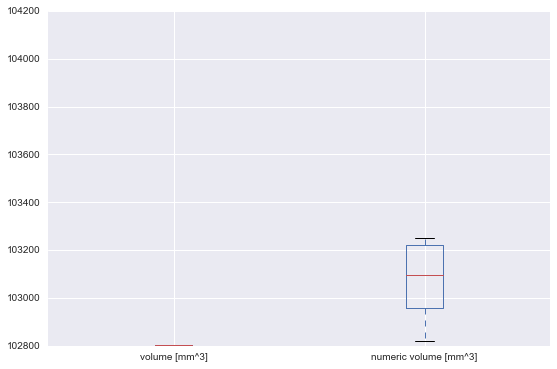

In [292]:
if len(dfsp) > 0:
    axp = dfsp[["volume [mm^3]", "numeric volume [mm^3]"]].plot(kind="box", **plotkw)

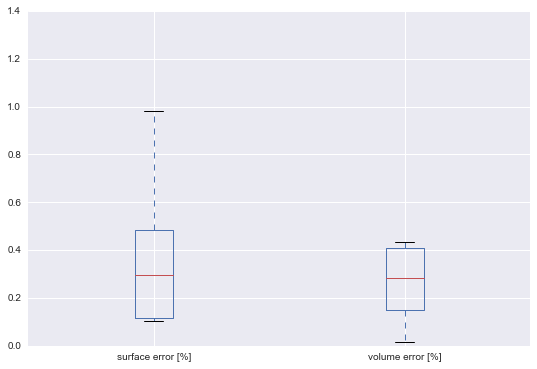

In [293]:
if len(dfsp) > 0:
    axp = dfsp[["surface error [%]", "volume error [%]"]].plot(kind="box", **plotkw)

best : 
surface (w/s): 
WilcoxonResult(statistic=0.0, pvalue=0.0050620321262678644) 
SpearmanrResult(correlation=nan, pvalue=nan) 
volume (w/s): 
WilcoxonResult(statistic=0.0, pvalue=0.0050620321262678644) 
SpearmanrResult(correlation=nan, pvalue=nan)


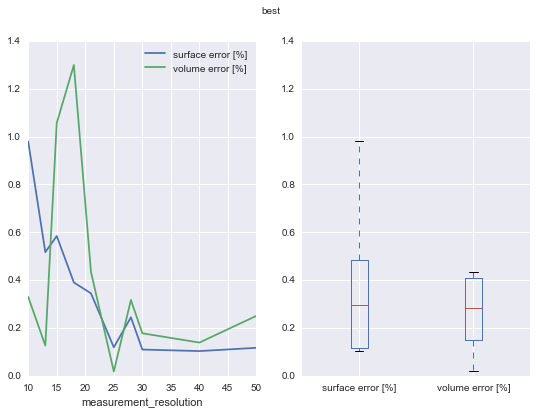

In [294]:
# for radius_method in ["cylinder volume + sphere compensation"]:
for radius_method in ["cylinder surface", "cylinder volume", "cylinder volume + sphere compensation", "best"]:

        
    dfs = df[
        df["output note"] == "compensation method 5 tubes " + radius_method
    ]
    
    dfplot(dfs, plotkw, radius_method)


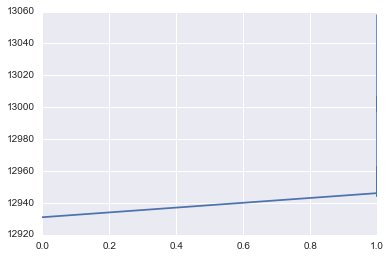

In [295]:
nsu = dfsp["numeric surface [mm^2]"]
su = dfsp["surface [mm^2]"]
nsux = np.ones([len(nsu)])
sux = np.zeros([len(su)])
y = np.concatenate([nsu, su])
x = np.concatenate([nsux,sux])
#plot(, np.concatenate([nsux,sux]))
plt.plot(x, y)

In [296]:
y.shape

(20,)

In [297]:
x.shape

(20,)

In [298]:
dfsp.describe()

,volume [mm^3],numeric volume [mm^3],surface [mm^2],numeric surface [mm^2],surface error [%],volume error [%]
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,102803.532046,103229.988452,12931.022562,12976.397923,0.350903,0.414827
std,0.000000,435.076037,0.000000,36.542891,0.282599,0.423211
min,102803.532046,102821.930058,12931.022562,12944.364284,0.103176,0.017896
25%,102803.532046,102956.155755,12931.022562,12946.205702,0.117416,0.148462
50%,102803.532046,103095.152960,12931.022562,12969.116232,0.294591,0.283668
75%,102803.532046,103223.188987,12931.022562,12993.759617,0.485167,0.408213
max,102803.532046,104139.382836,12931.022562,13057.748832,0.980017,1.299421


# Statistics

In [299]:
# for radius_method in ["cylinder volume + sphere compensation"]:
for radius_method in [
    "inscribed", 
    # "circumscribed", "cylinder surface", "cylinder volume",
    "average", 
    "cylinder volume + sphere compensation", 
    "best"]:

        
    dfs = df[
        df["output note"] == "fixed resolution " + radius_method
    ]
    
    dfsp = dfs[["surface error [%]", "volume error [%]", "measurement_resolution"]].sort_values(
        "measurement_resolution")
    
    dfplot(dfs, plotkw, radius_method)


In [300]:
dfs

,datetime,length [mm],volume [mm^3],surface [mm^2],area volume [mm^3],count [],numeric volume [mm^3],numeric surface [mm^2],length d. [mm^-2],volume d. [],...,postprocessing noise_lambda_stop,postprocessing noise_mean,postprocessing noise_rng_seed,postprocessing output_dtype,surface error [mm^2],surface error [%],volume error [mm^3],volume error [%],measurement_resolution,length_distribution_mean


## Surface

In [301]:
# wilcoxon - čím větší, tím lepší
scipy.stats.wilcoxon(x=dfs["surface [mm^2]"], y=dfs["numeric surface [mm^2]"], correction=False, zero_method="pratt")

WilcoxonResult(statistic=0.0, pvalue=nan)

In [302]:
scipy.stats.wilcoxon(dfs["surface error [%]"], correction=False, zero_method="pratt")

WilcoxonResult(statistic=0.0, pvalue=nan)

In [303]:
# spearman čím menší, tím lepší
scipy.stats.spearmanr(dfs["surface [mm^2]"], dfs["numeric surface [mm^2]"])

SpearmanrResult(correlation=nan, pvalue=nan)

## Volume

In [304]:
# wilcoxon - čím větší, tím lepší
scipy.stats.wilcoxon(x=dfs["volume [mm^3]"], y=dfs["numeric volume [mm^3]"], correction=False, zero_method="pratt")

WilcoxonResult(statistic=0.0, pvalue=nan)

In [305]:
# spearman čím menší, tím lepší
scipy.stats.spearmanr(dfs["volume [mm^3]"], dfs["numeric volume [mm^3]"])

SpearmanrResult(correlation=nan, pvalue=nan)

# Inscribed to circum

In [306]:
resolution = 6
radius = 10

alpha = (2*np.pi) / (resolution)
radius_out = radius / np.cos(alpha/2)

radius_out


11.547005383792515

In [307]:
np.cos(np.pi/2)

6.123233995736766e-17